## Global Model Agnostic AI Model Explanation: Permutation Feature Improtance


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [11]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

X = X.drop(['s1', 's6', 'age', 's2', 's6'], axis=1)

# Binning the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [12]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7528089887640449


In [14]:
updated_feature_names = [name for name in diabetes_data.feature_names if name not in ['s1', 's6', 'age', 's2', 's6']]

# Calculate permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=25, random_state=random_state)

# Create a DataFrame to store the permutation importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': updated_feature_names, 'Importance': result.importances_mean,
                               'std': result.importances_std})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

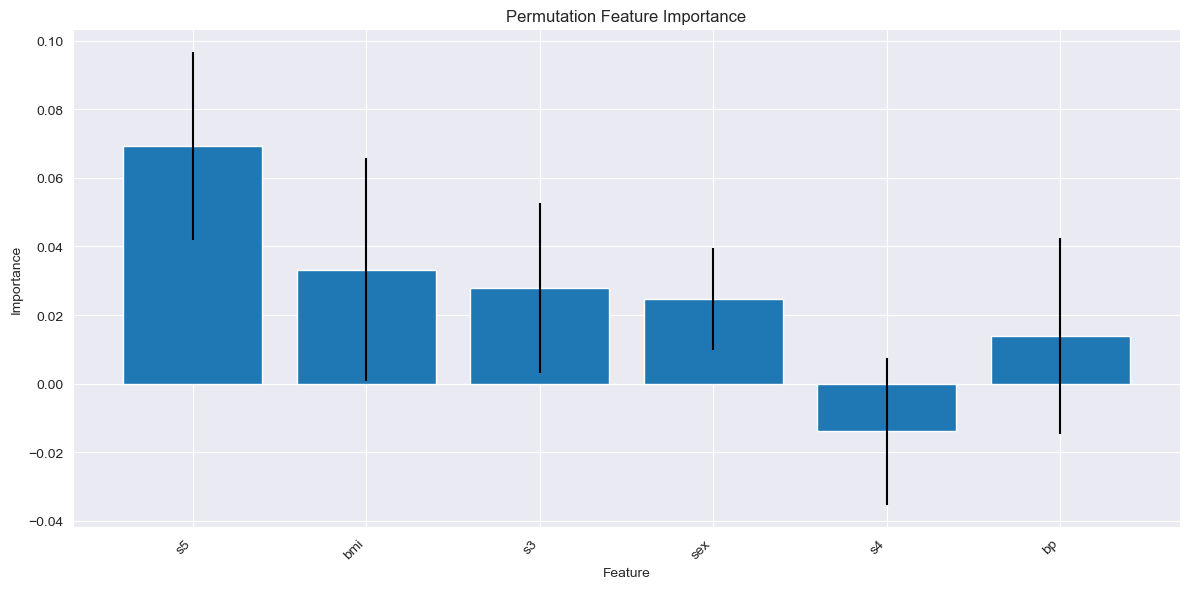

In [15]:

# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()
